In [13]:
import numpy as np
import pandas as pd

In [17]:
# Read Data from text file as data frame

In [19]:
# read file as list of lines
with open("SMSSpamCollection", "r") as f:
    lines = f.readlines()
# split lines into columns
col1=[]
col2=[]
for line in lines:
    s=""
    c=0
    for i in line:
        if i in "ham" or i in "spam":
            s=s+i
        else:
            col1.append(s)
            col2.append(line[c:].strip())
            break
        c+=1
# create dataframe
df = pd.DataFrame({'Category': col1, 'Text': col2})
print(df.head())

  Category                                               Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [20]:
print(df.iloc[1])

Category                              ham
Text        Ok lar... Joking wif u oni...
Name: 1, dtype: object


In [21]:
print(df['Text'][3])

U dun say so early hor... U c already then say...


In [22]:
print(df.shape)

(5574, 2)


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['Category'] = encoder.fit_transform(df['Category'])

In [26]:
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# missing values
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [28]:
# check for duplicate values
df.duplicated().sum()

414

In [29]:
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [31]:
# EDA

In [32]:
df.shape

(5160, 2)

In [33]:
df['Category'].value_counts()

0    4518
1     642
Name: Category, dtype: int64

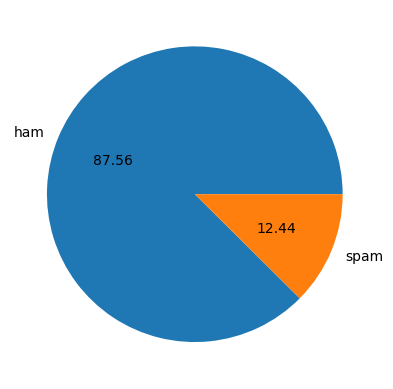

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
df['num_characters'] = df['Text'].apply(len)

In [38]:
df.head()

,Category,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,Category,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.139535,18.578876,1.951357
std,58.289027,13.390839,1.363466
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [43]:
df.head()

,Category,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.858787,17.279327,1.806109
std,56.584015,13.572536,1.281858
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
#spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.973520
std,29.975596,7.028380,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

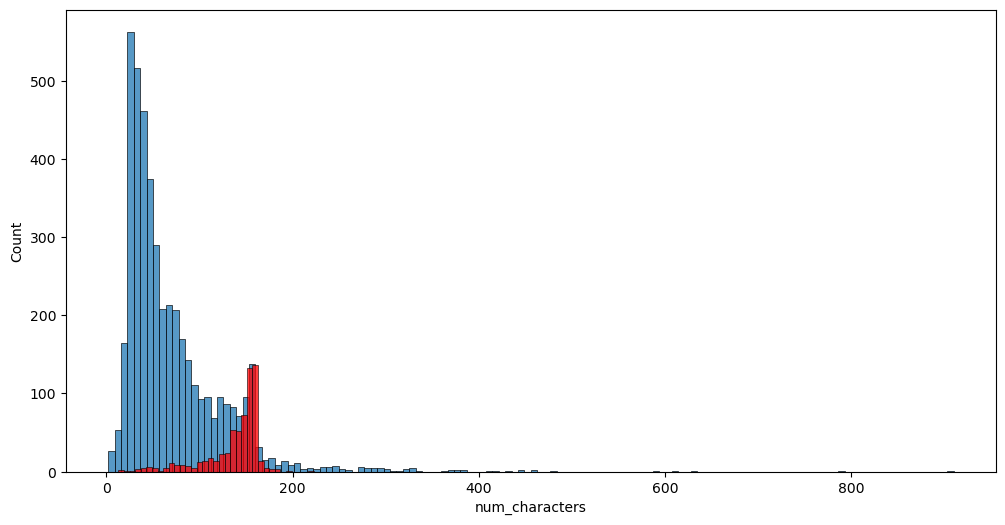

In [46]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

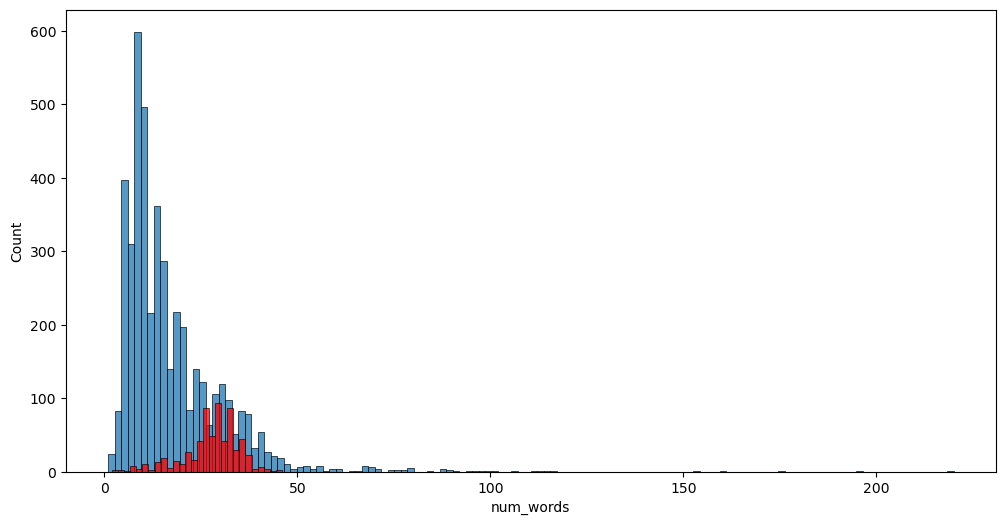

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color='red')

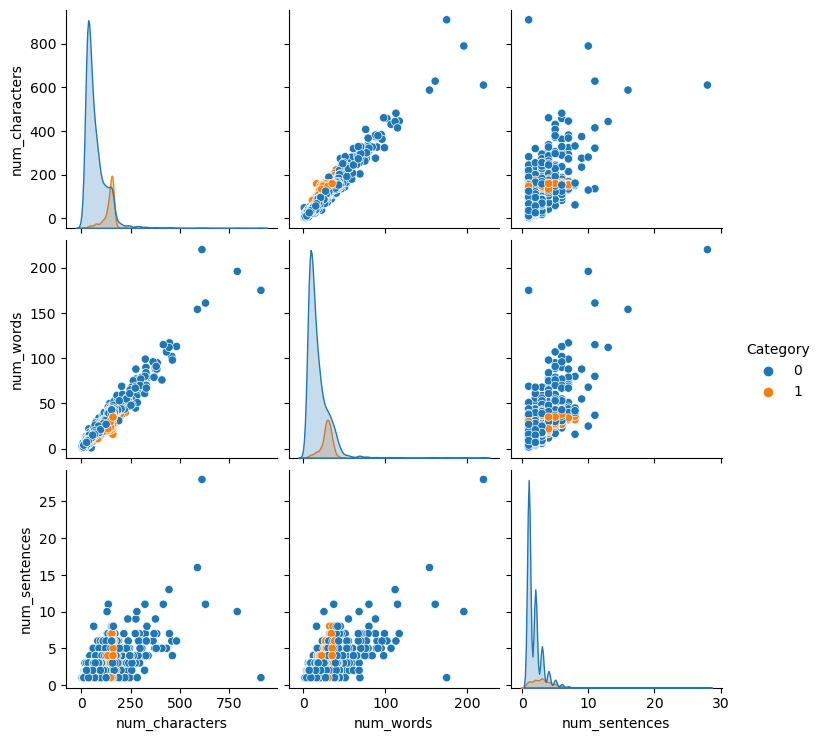

In [48]:
sns.pairplot(df,hue='Category')

<AxesSubplot:>

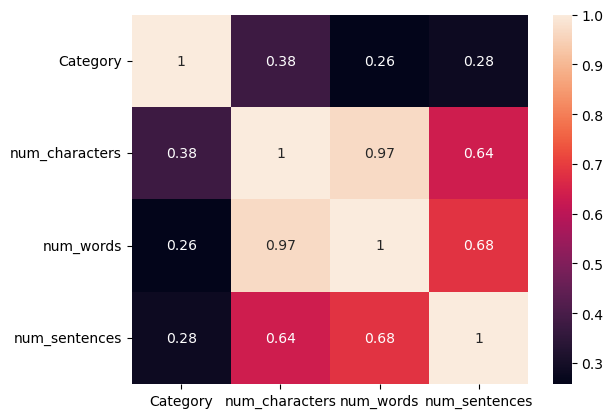

In [49]:
sns.heatmap(df.corr(),annot=True)

In [53]:
# 3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [54]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [56]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [57]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [58]:
df.head()

,Category,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

In [62]:
#Model Building

In [63]:
# Import libraries for splitting the data
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['Category'], test_size=0.2, random_state=42)


In [64]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the CountVectorizer on the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the testing data using the same CountVectorizer object
X_test_counts = vectorizer.transform(X_test)


In [65]:
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier on the training data
knn.fit(X_train_counts, y_train)

# Predict the labels of the testing data
y_pred = knn.predict(X_test_counts)


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score:", f1)


Confusion matrix:
 [[916   0]
 [ 86  30]]
Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.25862068965517243
F1 Score: 0.4109589041095891
